# Simple Linear Regression: Car Price Data

The aim of this project is to demonstrate understanding of regression and its principles. I will also aim to explain the implicit assumptions behind the methods used, interpret rgression outputs such as coefficients and p-values.

The Car Price dataset contains data on various car models and in this demonstration, I want to predict the car price(dependent variable) from its features (independent variable)

In [1]:
import pandas as pd
import matplotlib.pyplot as plot
import statsmodels.api as stats
import numpy as np

In [2]:
carprice_df = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
### Assessing the Data

In [4]:
# print shape of dataframe and first five rows

print(carprice_df.shape)

carprice_df.head()


(205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
# check the datatype of columns
carprice_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
# check for unique values in specifically the categorical variables

carprice_df.select_dtypes(include='object').nunique()


CarName           147
fueltype            2
aspiration          2
doornumber          2
carbody             5
drivewheel          3
enginelocation      2
enginetype          7
cylindernumber      7
fuelsystem          8
dtype: int64

The data contains a mixture of numeric types and categorical (object) types.I will remove the car_ID field from the data as this is only an identifier. CarName will also be removed from the data as it contains a large number of unique values and useful information cant be extracted from it

In [7]:
#drop car_ID and CarName
carprice_df = carprice_df.drop(columns=['car_ID', 'CarName'])

## Full Multiple Regression Model


Before building the full regression model, the data needs to be prepared and reduce the independent variables 

The correlation between different numerical variables can be analysed using correlation matrix. Some independent variables that are highly correlated will cause problems with the algorithm due to multicollinearity.

In [8]:
carprice_df.select_dtypes(exclude='object').corr().style.background_gradient(cmap='coolwarm')

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


The highwaympg and citympg are highly correlated with a correlation coefficient of 0.97. Removing highwympg will get rid of this correlation and help reduce the complexity of the model. I also chose to remove carlength and carwidth to remove some more high correlations. 

In [9]:
carprice_df = carprice_df.drop(columns=['carlength', 'carwidth', 'highwaympg'])

### One Hot Encoding

Categorical data can be used by one hot encoding it. This is where each category is made its own independent variable which has a binary 1/0 value. The first value is dropped to prevent multicollinearity. Using the pd.get_dummies() to do this and then join them back to the numerical variables.

In [10]:
#create dummy variables
dummy = pd.get_dummies(carprice_df.select_dtypes(include='object'), drop_first=True)

#concat dummy variables and numerical continuous variables
carprice_df = pd.concat([carprice_df.select_dtypes(exclude='object'), dummy], axis=1)

The correlation matrix can be built again including the one hot encoded features.

In [11]:
carprice_df.corr().style.background_gradient(cmap='coolwarm')

,symboling,wheelbase,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
symboling,1.000000,-0.531954,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,-0.079978,0.194311,-0.059866,0.664073,0.168845,0.435648,-0.378341,-0.298243,0.102839,-0.076381,0.212471,0.009347,-0.133979,-0.082855,0.037513,-0.013597,0.245950,-0.090188,-0.034161,-0.000238,0.065707,-0.047012,0.245950,-0.034069,0.212471,-0.194311,0.122067,0.012532,0.181939,0.065707
wheelbase,-0.531954,1.000000,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,0.577816,-0.308346,0.257611,-0.447357,-0.008608,-0.386094,0.291086,0.210899,-0.460355,0.498830,-0.187790,-0.004156,0.399603,-0.204037,-0.183195,0.166152,-0.081174,0.261182,-0.309492,0.145842,-0.120709,0.037803,-0.081174,-0.396505,-0.070124,0.308346,-0.033294,0.348891,-0.117359,-0.032129
carheight,-0.541038,0.589435,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,0.119336,-0.284631,0.087311,-0.552208,-0.072328,-0.477476,0.235863,0.459148,-0.100273,0.039814,-0.106234,-0.092628,0.319687,0.036260,-0.046670,-0.065063,-0.238720,0.152982,0.059696,-0.049777,-0.015076,-0.170181,-0.238720,-0.079418,-0.206225,0.284631,-0.101245,0.108685,-0.278615,-0.066778
curbweight,-0.227691,0.776386,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,0.835305,-0.217275,0.324902,-0.197379,0.098956,-0.287501,0.099425,0.164075,-0.666039,0.669987,0.050468,0.109243,0.250124,-0.413293,-0.080295,0.400878,-0.039196,0.264554,-0.576463,0.405490,-0.143903,0.187964,-0.039196,-0.577159,-0.040801,0.217275,0.034431,0.520220,-0.002434,0.024052
enginesize,-0.105790,0.569329,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,0.874145,-0.069594,0.108217,-0.020742,0.239363,-0.216805,0.088459,-0.027518,-0.518391,0.565509,0.196826,0.128248,0.016063,-0.363334,-0.016508,0.562403,-0.184762,0.144878,-0.631431,0.511783,-0.111081,0.335555,-0.184762,-0.442562,-0.166946,0.069594,0.049033,0.483520,0.004490,-0.013327
boreratio,-0.130051,0.488750,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,0.553173,-0.054451,0.212614,-0.119258,0.208089,-0.227032,0.030517,0.105719,-0.583087,0.574105,0.185042,0.158136,0.181729,-0.410383,0.326798,0.119509,0.000127,-0.007797,-0.164076,0.128365,-0.108774,0.054482,0.000127,-0.353342,0.000110,0.054451,0.070030,0.419335,-0.004213,0.025977
stroke,-0.008735,0.160959,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,0.079443,-0.241829,0.222982,0.011082,0.043215,0.052316,0.035630,-0.095084,0.124397,-0.022325,-0.138455,-0.032545,-0.084688,0.366084,-0.522808,-0.044813,-0.000187,0.176485,-0.111046,0.068388,-0.050450,-0.110878,-0.000187,-0.234866,-0.000162,0.241829,0.144263,-0.110280,0.251259,-0.005688
compressionratio,-0.178515,0.249786,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.067984,-0.984356,0.295541,-0.177888,0.029623,-0.202650,0.188286,0.016315,-0.062683,0.105185,-0.019762,-0.002519,0.219153,0.027545,-0.084328,-0.086649,-0.026436,0.173360,-0.012522,-0.065559,-0.011354,0.023986,-0.026436,-0.183384,-0.022838,0.984356,-0.055528,-0.311035,-0.153726,-0.016654
horsepower,0.070873,0.353294,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,0.808139,0.163926,0.241685,0.126947,0.194801,-0.053770,-0.024097,-0.063081,-0.544438,0.57

In [12]:
high_correlation_variables = ['compressionratio', 'drivewheel_fwd', 'enginetype_rotor', 'fuelsystem_4bbl', 'fuelsystem_idi']

#drop high correlated variables
carprice_df = carprice_df.drop(high_correlation_variables, axis=1)

#check shape of dataframe
carprice_df.shape

(205, 36)

### Test/Train Split


The model will train on 70% of the data and test its results on the remaining 30%. The df.sample() method takes a random sample of the dataframe with size specified by frac aragument. The test set as the remaining rows not in this random sample.

In [26]:
#random state is a seed value

train_df=carprice_df.sample(frac=0.7, random_state=101) 
test_df=carprice_df.drop(train_df.index)

print('Training set:',train_df.shape,'Test set', test_df.shape)

Training set: (144, 36) Test set (61, 36)


### Fitting the Linear Regression Model 


The statsmodels can be used to fit the linear regression model by dividing the dependent and independent variables

In [27]:
# dependent variable as the Y_train
Y_train = train_df.price
# independent variable as the X_train
X_train = stats.add_constant(train_df.drop(columns=['price']))

In [28]:
model_carprice = stats.OLS(Y_train, X_train)
results_carprice = model_carprice.fit()

In [29]:
# get a view of the regression summary

print(results_carprice.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     45.55
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           3.67e-50
Time:                        05:56:25   Log-Likelihood:                -1290.5
No. Observations:                 144   AIC:                             2651.
Df Residuals:                     109   BIC:                             2755.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4589.81

For example here the enginelocation_rear has a coefficient of 7389 so when everything else is constant, a car with the engine in the rear we predict will cost an extra \\$7389 than a car with the engine in the front on average. Also, it was predicted that for every unit of weight heavier a car is, the car will cost an extra $3.3. In this state we cannot compare the coefficients to one another as they all have different units - it makes no sense to compare pounds in curbweight with rpm in peakrpm! 

We can also use our test set to compare our predictions with the observed values.

In [30]:
Y_test = test_df.price
test_df = stats.add_constant(test_df)
X_test = test_df[X_train.columns]

test_predictions = results_carprice.predict(X_test)

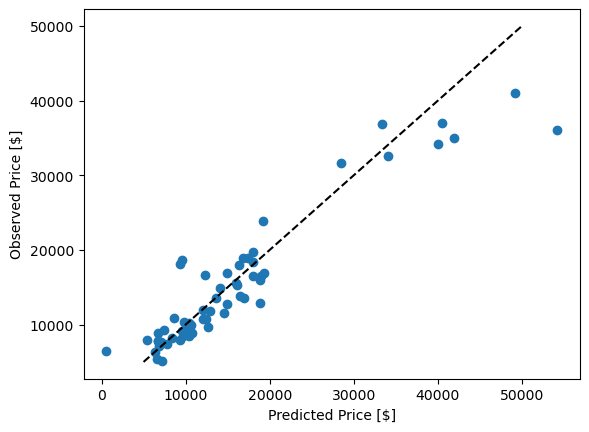

In [31]:
plot.scatter(test_predictions, Y_test)
plot.plot([5000, 50000], [5000, 50000], c='k', ls='--')
plot.xlabel('Predicted Price [$]')
plot.ylabel('Observed Price [$]')
plot.show()

# Interpreting Linear Regression

In this section, I will explore methods used to interpret and evaluate the results of our linear regression model. 

# p-Values and Coefficients


### p-Values

The statsmodel summary output provides the p-values assciated with each of our regression coefficients given in the P>|t| column

In [32]:
print(results_carprice.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     45.55
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           3.67e-50
Time:                        05:56:38   Log-Likelihood:                -1290.5
No. Observations:                 144   AIC:                             2651.
Df Residuals:                     109   BIC:                             2755.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4589.81

Many of the independent variables are not significant at the 5% level i.e. they have p-value >0.05. These variables can be discarded from the model and re-train the model with only the statistically significant variables. The process can be repeated until all the independent variables are significant.

### Re-training the Model

In [34]:
Y_train_new = train_df.price
X_train_new = stats.add_constant(train_df[['enginesize', 
                                    'stroke', 
                                    'peakrpm', 
                                    'fueltype_gas', 
                                    'carbody_hardtop', 
                                    'carbody_hatchback', 
                                    'enginelocation_rear',
                                    'enginetype_ohc',
                                    'cylindernumber_five',
                                    'cylindernumber_four',
                                    'cylindernumber_six']])

model_carprice_new = stats.OLS(Y_train_new, X_train_new)
results_carprice_new = model_carprice_new.fit()

In [35]:
print(results_carprice_new.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     90.22
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           8.02e-56
Time:                        05:56:42   Log-Likelihood:                -1332.3
No. Observations:                 144   AIC:                             2689.
Df Residuals:                     132   BIC:                             2724.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5265.5852   3

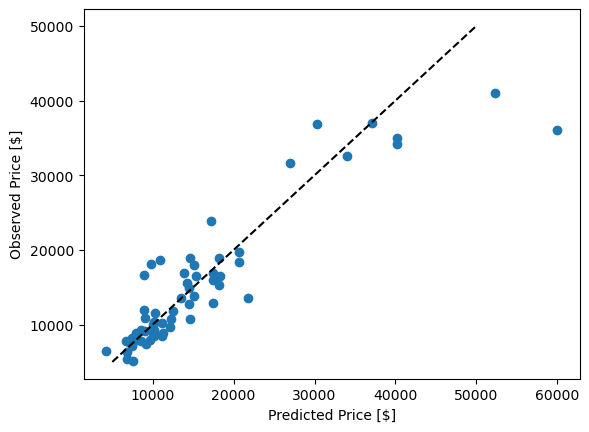

In [36]:
Y_test_new = test_df.price
X_test_new = test_df[X_train_new.columns]

test_predictions_new = results_carprice_new.predict(X_test_new)

plot.scatter(test_predictions_new, Y_test_new)
plot.plot([5000, 50000], [5000, 50000], c='k', ls='--')
plot.xlabel('Predicted Price [$]')
plot.ylabel('Observed Price [$]')
plot.show()

### Coefficients

The coefficients tell how much the target variable changes for a one unit change in the corresponding independent variable when all the other independent variables are held fixed. A measure can be gotten of which independent variable contributes the most change to the target variable if all the independent variables are scaled to remove the units.

In [37]:
X_train_scale = ((X_train_new - X_train_new.mean())/X_train_new.std()).drop(columns=['const'])

#retrain model
X_train_scale = stats.add_constant(X_train_scale)

model_carprice_scale = stats.OLS(Y_train_new, X_train_scale)
results_carprice_scale = model_carprice_scale.fit()

print(results_carprice_scale.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     90.22
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           8.02e-56
Time:                        06:05:04   Log-Likelihood:                -1332.3
No. Observations:                 144   AIC:                             2689.
Df Residuals:                     132   BIC:                             2724.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.248e+04    

The magnitudes of the coefficients now tell how much they contribute to the change in price relative to each other. These can be plotted in a bar chart using the df.plot.bar() method to make all the values positive since we are only concerned with the magnitudes.

<AxesSubplot:>

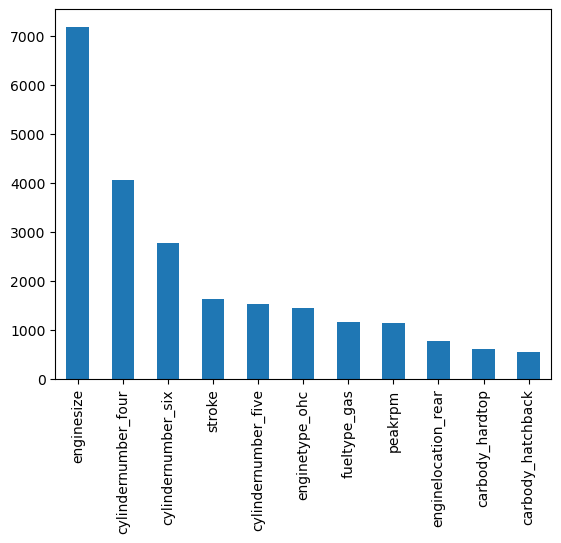

In [38]:
results_carprice_scale.params.drop(index=['const']).abs().sort_values(ascending=False).plot.bar()

It can be that a change in engine size contributes the biggest change to the price while whether the car is a hatchback or not contributes the least. In a sense this shows how important each feature is relatively to the model.

# Residuals and Residual Plots

The model can be assessed using the residuals between the predicted values and the observed values. statsmodels results instances have a method .resid for calculating these residuals.

In [40]:
results_carprice_new.resid

120    -185.205528
185   -1485.475419
180   -3815.947168
119     872.815707
109    3492.490264
          ...     
86    -3061.198405
193    2037.957826
20    -1383.557493
155    1392.163478
10     2523.359750
Length: 144, dtype: float64

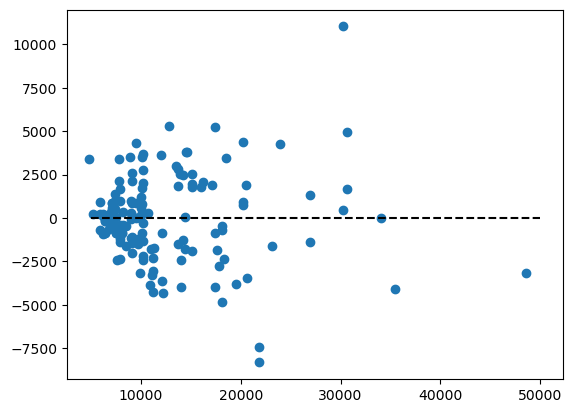

In [41]:
#plot residuals against predicted values for training data and observe for non random pattern

plot.scatter(results_carprice_new.fittedvalues, results_carprice_new.resid)
plot.plot([5000,50000], [0,0], c='k', ls='--')

# Evaluating Linear Regression


statsmodels helps with calculation of metrics like mean square error, root mean square error, mean absolute error, $R^{2}$ adjusted $R^{2}$

In [43]:
train_mse = stats.tools.eval_measures.mse(Y_train_new, results_carprice_new.fittedvalues)
print('The training dataset mean square error is {}'.format(train_mse.round(1)))

The training dataset mean square error is 6361335.8


In [44]:
train_rmse = stats.tools.eval_measures.rmse(Y_train_new, results_carprice_new.fittedvalues)
print('The training dataset root mean square error is {}'.format(train_rmse.round(1)))

The training dataset root mean square error is 2522.2


In [45]:
train_mae = stats.tools.eval_measures.meanabs(Y_train_new, results_carprice_new.fittedvalues)
print('The training dataset mean absolute error is {}'.format(train_mae.round(1)))

The training dataset mean absolute error is 1851.4


In [46]:
train_r2 = results_carprice_new.rsquared
print('The training dataset coefficient of determination is {}'.format(train_r2.round(3)))

The training dataset coefficient of determination is 0.883


In [47]:
train_r2_adj = results_carprice_new.rsquared_adj
print('The training dataset adjusted coefficient of determination is {}'.format(train_r2_adj.round(3)))

The training dataset adjusted coefficient of determination is 0.873


the root mean square error shows that the predictions are typically around \\$3000 off from the observed values and that the data explains 88.3% of the variation from the coefficient of determination.